<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/animal_by_CNN_ALEX_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=30)

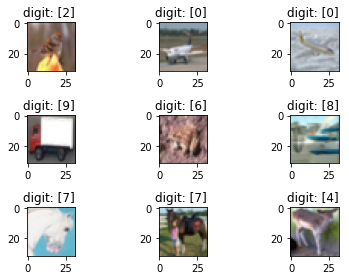

In [ ]:
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray')
  plt.minorticks_off
  plt.title("digit: {} ".format(y_train[i]))
  

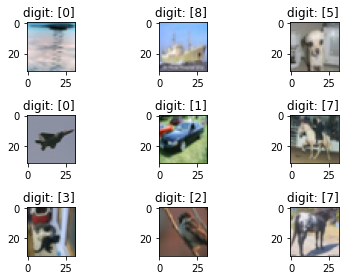

In [ ]:
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_val[i],cmap='gray')
  plt.minorticks_off
  plt.title("digit: {} ".format(y_val[i]))

In [ ]:
AlexNet=Sequential()

In [ ]:
#1 covlayer


AlexNet.add(Conv2D(96,input_shape=(227,227,3),kernel_size=(11,11),strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [ ]:
AlexNet.add(Conv2D(256,input_shape=(227,227,3),kernel_size=(5,5),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))


In [ ]:
AlexNet.add(Conv2D(384,input_shape=(227,227,3),kernel_size=(3,3),strides=(2,2),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [ ]:
AlexNet.add(Conv2D(384,input_shape=(227,227,3),kernel_size=(3,3),strides=(2,2),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [ ]:
AlexNet.add(Conv2D(384,input_shape=(227,227,3),kernel_size=(3,3),strides=(2,2),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [ ]:
AlexNet.add(Flatten())
#flatten

In [ ]:
#fully connected layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0,4))

AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0,4))

AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0,4))

AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


In [ ]:

AlexNet.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=.1)
val_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=.1)
test_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=.1)
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)
x_train_generator=train_generator.flow(x_train,y_train,batch_size=100)
x_val_generator=train_generator.flow(x_val,y_val,batch_size=100)
x_test_generator=train_generator.flow(x_test,y_test,batch_size=100)


In [ ]:
type(x_test_generator)

keras.preprocessing.image.NumpyArrayIterator

In [ ]:
AlexNet.fit(x_train_generator,epochs=5,validation_data=x_val_generator,verbose=2)

Epoch 1/5
500/500 - 879s - loss: 103.6215 - accuracy: 0.0451 - val_loss: 98.2600 - val_accuracy: 0.0000e+00 - 879s/epoch - 2s/step
Epoch 2/5
500/500 - 847s - loss: 103.6208 - accuracy: 0.0896 - val_loss: 98.2503 - val_accuracy: 0.2000 - 847s/epoch - 2s/step
Epoch 3/5
500/500 - 842s - loss: 103.6203 - accuracy: 0.0716 - val_loss: 98.2447 - val_accuracy: 0.1000 - 842s/epoch - 2s/step
Epoch 4/5
500/500 - 842s - loss: 103.6204 - accuracy: 0.0166 - val_loss: 98.2464 - val_accuracy: 0.0000e+00 - 842s/epoch - 2s/step
Epoch 5/5
500/500 - 842s - loss: 103.6202 - accuracy: 0.0254 - val_loss: 98.2445 - val_accuracy: 0.0000e+00 - 842s/epoch - 2s/step


In [ ]:
y_pred=AlexNet.predict(x_test)

ValueError: ignored

In [ ]:
def transform_pred(pred):
  transformed_pred_list=[]
  for i in range (len(pred)):
    max_index=np.argmax(pred[i])
    transformed_pred_list.append(max_index)
  return transformed_pred_list


In [ ]:
y_pred_transformed=transform_pred(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
res_acc=accuracy_score(y_pred_transformed,y_test)
res_acc